In [1]:
import math
import pandas as pd
import tensorflow as tf
# import keras_tuner.tuners as kt
import matplotlib.pyplot as plt
import keras
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
import numpy as np
import pickle
np.random.seed(0)
from tensorflow.keras import Input
from tensorflow.keras.layers import Conv1D, Conv2D, LeakyReLU, MaxPool1D, AveragePooling1D, UpSampling1D, Flatten, Dense, Reshape, BatchNormalization
# https://towardsdatascience.com/improve-your-model-performance-with-auto-encoders-d4ee543b4154
from tensorflow.keras import initializers
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure


In [2]:
x_train_scaled = pd.read_csv('260_sample_train_scaled.csv').set_index("Patient_ID")
x_train_scaled

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
55_control,0.702813,0.799052,0.719665,0.729547,0.794953,0.256451,1.000000,0.363133,0.374212,0.611161,...,0.468042,0.335792,0.0,0.609518,0.535456,0.0,0.543158,0.622641,0.0,1.0
168_CD_plain,0.751408,0.603707,0.622768,0.627712,0.606860,0.520576,0.311962,0.251356,0.553554,0.441131,...,0.000000,0.159464,0.0,0.173529,0.018188,0.0,0.623796,0.301179,0.0,0.0
72_control,0.786508,0.755331,0.739605,0.756170,0.819875,0.391132,0.648401,0.134017,0.200420,0.679453,...,0.335173,0.241577,0.0,0.659563,0.000000,0.0,0.853118,0.431083,0.0,0.0
120_control,0.707491,0.662993,0.648072,0.764621,0.654276,0.633929,0.579519,0.248934,0.759250,0.755407,...,0.181256,0.297248,0.0,0.837676,0.480372,0.0,0.392582,0.390569,0.0,0.0
258_CD_plain,0.701039,0.662511,0.707208,0.834562,0.670160,0.410612,0.370517,0.244987,0.445387,0.798000,...,0.319013,0.306320,0.0,0.893448,0.485539,0.0,0.259900,0.431818,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15_CD_plain,0.382762,0.384030,0.377332,0.360165,0.300915,0.340090,0.077348,0.890965,0.261140,0.205779,...,0.209212,0.301844,0.0,0.643267,0.143476,0.0,0.262892,0.189790,0.0,0.0
182_CD_plain,0.679910,0.584723,0.722426,0.643867,0.740014,0.650358,0.468650,0.295686,0.649939,0.609862,...,0.408592,0.042243,0.0,0.765285,0.527984,0.0,0.413798,0.270021,0.0,0.0
164_CD_plain,0.754656,0.556562,0.694062,0.748334,0.535534,0.133869,0.319071,0.154562,0.440487,0.824013,...,0.514164,0.364434,0.0,0.930260,0.481733,0.0,0.273699,0.433093,0.0,0.0


In [3]:
x_test_scaled = pd.read_csv('260_sample_test_scaled.csv').set_index("Patient_ID")
x_test_scaled

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
253_CD_plain,0.869185,0.841880,0.930171,0.886737,0.835678,0.297964,0.668498,0.266670,0.278122,0.933520,...,0.339788,0.326732,0.0,0.862246,0.074473,0.0,0.498941,0.349920,0.0,0.0
105_CD_plain,0.853562,0.933532,0.942213,0.794578,0.890482,0.206529,0.298987,0.350745,0.495663,0.849038,...,0.354602,-0.031527,0.0,0.717305,0.039214,0.0,0.697073,0.268224,0.0,0.0
2_CD_plain,0.165531,0.141475,0.263684,0.198091,0.160503,0.888878,0.000000,0.134461,0.989132,0.202203,...,0.320002,0.379134,0.0,0.604202,0.610072,0.0,0.324065,0.375123,0.0,0.0
184_CD_plain,0.717121,0.660314,0.769417,0.752737,0.694874,0.514735,0.692365,0.271127,0.650742,0.694599,...,0.445680,0.178908,0.0,0.702114,0.325357,0.0,0.390919,0.185509,0.0,0.0
312_CD_plain,0.730072,0.722909,0.713076,0.743545,0.679258,0.308459,0.399235,0.129019,0.597529,0.720390,...,0.419254,0.312215,0.0,0.821584,0.632007,0.0,0.183158,0.271359,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107_CD_plain,0.736123,0.658232,0.772323,0.685637,0.658755,0.250970,0.247307,0.422075,0.555944,0.603675,...,0.379431,0.233196,0.0,0.759342,0.567491,0.0,0.404604,0.190411,0.0,0.0
279_CD_plain,0.220614,0.202090,0.182810,0.113245,0.105744,0.699851,0.000000,0.908485,0.688912,0.178259,...,0.181052,0.342262,0.0,0.639644,0.540444,0.0,0.397274,0.061934,0.0,0.0
179_CD_plain,0.724476,0.726774,0.766943,0.776284,0.690339,0.380637,0.440449,0.318944,0.558600,0.738787,...,0.331961,0.275577,0.0,0.886616,0.658049,0.0,0.259391,0.471132,0.0,0.0


## Gene expression distributions of test set (post scaling)

In [4]:
# tsne_dataset

In [5]:
hundred_control = x_test_scaled.loc[x_test_scaled.index.str.endswith('_control')]
hundred_CD_plain = x_test_scaled.loc[x_test_scaled.index.str.endswith('_CD_plain')]
hundred_CD_deep_ulcer = x_test_scaled.loc[x_test_scaled.index.str.endswith('_CD_deep_ulcer')]
datasets = [hundred_control, hundred_CD_plain, hundred_CD_deep_ulcer]
labels = ["Control", "Crohn's Disease", "Crohn's Disease Deep Ulcer"]
colours = ["green", "orange", "red"]

In [6]:
# import matplotlib.pyplot as plt
# import scipy.stats as stats
# import math

# for gene_symbol in hundred_control.columns:
#     for i in range(len(datasets)):
#         ds = datasets[i]
#         label = labels[i]
#         colour = colours[i]
#         vals = ds[gene_symbol].values
#         gene_stats = ds.describe()
#         g_mean = gene_stats.loc["mean", gene_symbol]
#         g_std = gene_stats.loc["std", gene_symbol]
#         g_min = gene_stats.loc["min", gene_symbol]
#         g_max = gene_stats.loc["max", gene_symbol]

#         mu = g_mean
#         variance = g_std**2
#         sigma = math.sqrt(variance)
#         x = np.linspace(g_min, g_max, 100)
#         plt.plot(x, stats.norm.pdf(x, mu, sigma), label=label, c=colour)

#         if i<4:
#             plt.hist(vals, bins=25, density=True, alpha=0.6, color=colour)
#     plt.title(gene_symbol+" Distributions")
#     plt.xlabel('Gene expression (FPKM)')
#     plt.ylabel('Probability density')
#     plt.legend()
#     plt.show()

# Class contrastive explainability

## CD Deep Ulcer patient

In [7]:
test_set = x_test_scaled.copy()
test_set

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
253_CD_plain,0.869185,0.841880,0.930171,0.886737,0.835678,0.297964,0.668498,0.266670,0.278122,0.933520,...,0.339788,0.326732,0.0,0.862246,0.074473,0.0,0.498941,0.349920,0.0,0.0
105_CD_plain,0.853562,0.933532,0.942213,0.794578,0.890482,0.206529,0.298987,0.350745,0.495663,0.849038,...,0.354602,-0.031527,0.0,0.717305,0.039214,0.0,0.697073,0.268224,0.0,0.0
2_CD_plain,0.165531,0.141475,0.263684,0.198091,0.160503,0.888878,0.000000,0.134461,0.989132,0.202203,...,0.320002,0.379134,0.0,0.604202,0.610072,0.0,0.324065,0.375123,0.0,0.0
184_CD_plain,0.717121,0.660314,0.769417,0.752737,0.694874,0.514735,0.692365,0.271127,0.650742,0.694599,...,0.445680,0.178908,0.0,0.702114,0.325357,0.0,0.390919,0.185509,0.0,0.0
312_CD_plain,0.730072,0.722909,0.713076,0.743545,0.679258,0.308459,0.399235,0.129019,0.597529,0.720390,...,0.419254,0.312215,0.0,0.821584,0.632007,0.0,0.183158,0.271359,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107_CD_plain,0.736123,0.658232,0.772323,0.685637,0.658755,0.250970,0.247307,0.422075,0.555944,0.603675,...,0.379431,0.233196,0.0,0.759342,0.567491,0.0,0.404604,0.190411,0.0,0.0
279_CD_plain,0.220614,0.202090,0.182810,0.113245,0.105744,0.699851,0.000000,0.908485,0.688912,0.178259,...,0.181052,0.342262,0.0,0.639644,0.540444,0.0,0.397274,0.061934,0.0,0.0
179_CD_plain,0.724476,0.726774,0.766943,0.776284,0.690339,0.380637,0.440449,0.318944,0.558600,0.738787,...,0.331961,0.275577,0.0,0.886616,0.658049,0.0,0.259391,0.471132,0.0,0.0


In [8]:
# pid = '212_CD_deep_ulcer'
def get_patient(symptom, frac=2):
    poss_patients = test_set.loc[test_set.index.str.endswith(symptom)]
    print(len(poss_patients),"possible")
    selected_patient = poss_patients.iloc[[len(poss_patients)//frac]]
    pid = selected_patient.index[0]
    return selected_patient, pid

selected_patient, pid = get_patient('CD_deep_ulcer')
selected_patient

24 possible


,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
260_CD_deep_ulcer,0.588189,0.625309,0.750597,0.746795,0.678619,0.578012,0.191236,0.321755,0.595506,0.569387,...,0.327476,0.256429,0.0,0.787863,0.559487,0.0,0.363882,0.283622,0.0,0.0


In [9]:
pid

'260_CD_deep_ulcer'

In [10]:
ind = km_dataset.index
selected_patient_idx = ind.get_loc(pid)


NameError: name 'km_dataset' is not defined

In [ ]:


plot_pca(km_dataset, kmeans, k_labels, selected_patient_idx)

In [ ]:
### MODIFIED UP TO HERE

### Modify gene expressions for the selected patient - 60 genes

In [76]:
test_set = x_test_scaled.copy()

selected_patient = test_set.loc[test_set.index.str.startswith(pid)]
selected_patient

# selected_patient, pid = get_patient('CD_deep_ulcer')
# selected_patient

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
260_CD_deep_ulcer,0.588189,0.625309,0.750597,0.746795,0.678619,0.578012,0.191236,0.321755,0.595506,0.569387,...,0.327476,0.256429,0.0,0.787863,0.559487,0.0,0.363882,0.283622,0.0,0.0


In [77]:
with open("most_diff_genes_60", "rb") as fp:   # Unpickling
    most_diff_genes_60 = pickle.load(fp)

In [78]:
def modify_expression(pid, most_diff_genes, dataset):
    print("dataset size (should be test):",dataset.shape)
    controls = dataset.loc[dataset.index.str.endswith('_control')]
#     plains = x_test_scaled.loc[x_test_scaled.index.str.endswith('_CD_plain')]
#     ulcers = x_test_scaled.loc[x_test_scaled.index.str.endswith('_CD_deep_ulcer')]
    
    for gene_symbol in most_diff_genes:
        new_val = controls.describe().loc["mean", gene_symbol]
        dataset.loc[dataset.index.str.startswith(pid), gene_symbol] = new_val
    return dataset



In [79]:
test_set.columns

Index(['AADAC', 'APOA1', 'APOA4', 'APOB', 'APOC3', 'AQP9', 'C6', 'CEACAM7',
       'CHI3L1', 'ABCC2',
       ...
       'TAF15', 'ZFYVE20', 'LOC100420253', 'LY6G5B', 'C5orf58', 'RSL24D1P1',
       'MIEN1', 'PCBP1_AS1', 'LOC100133165', 'DNAJB8'],
      dtype='object', length=219)

In [80]:
test_set = modify_expression(pid, most_diff_genes_60, test_set)
test_set.loc[test_set.index.str.startswith(pid)]

dataset size (should be test): (78, 219)


,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
260_CD_deep_ulcer,0.837271,0.625309,0.800854,0.834515,0.740914,0.578012,0.638968,0.173455,0.313654,0.836045,...,0.327476,0.256429,0.0,0.787863,0.559487,0.0,0.363882,0.283622,0.0,0.0


## Re-encoding the dataset

In [81]:
pca_dataset, pca_x_test = encode_pca(test_set)
pca_dataset

,0,1
Patient_ID,,
253_CD_plain,-2.925279,0.182552
105_CD_plain,-2.115507,0.991462
2_CD_plain,4.494185,-1.191173
184_CD_plain,0.020712,0.624268
312_CD_plain,-0.653210,-0.360928
...,...,...
107_CD_plain,-0.582347,-0.948899
279_CD_plain,3.567900,-1.041802
179_CD_plain,-1.269183,-0.587896


## Replot tSNE

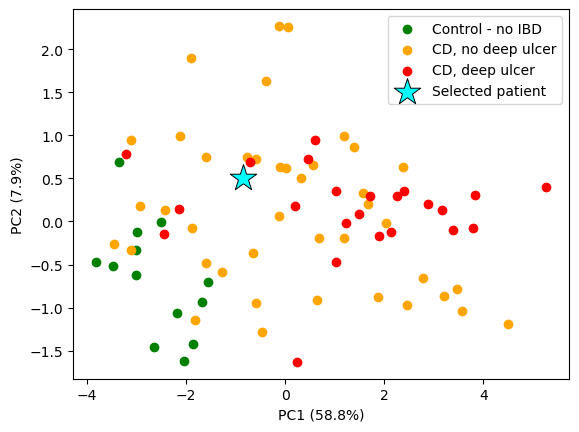

In [82]:


plot_pca(pca_dataset, selected_patient_idx)

### Modify gene expressions for the selected patient - 120 genes

In [83]:
test_set = x_test_scaled.copy()

selected_patient = test_set.loc[test_set.index.str.startswith(pid)]
selected_patient

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
260_CD_deep_ulcer,0.588189,0.625309,0.750597,0.746795,0.678619,0.578012,0.191236,0.321755,0.595506,0.569387,...,0.327476,0.256429,0.0,0.787863,0.559487,0.0,0.363882,0.283622,0.0,0.0


In [84]:

# selected_patient = tsne_dataset.loc[tsne_dataset.index.str.startswith(pid)]
# selected_patient

In [85]:
with open("most_diff_genes_115", "rb") as fp:   # Unpickling
    most_diff_genes = pickle.load(fp)

most_diff_genes

['FDCSP', 'FNDC4', 'JKAMP', 'RUFY4']

In [86]:
test_set = modify_expression(pid, most_diff_genes, test_set)
test_set.loc[test_set.index.str.startswith(pid)]

dataset size (should be test): (78, 219)


,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
260_CD_deep_ulcer,0.588189,0.625309,0.750597,0.746795,0.678619,0.578012,0.191236,0.321755,0.595506,0.569387,...,0.327476,0.256429,0.0,0.787863,0.559487,0.0,0.363882,0.283622,0.0,0.0


## Re-encoding the dataset

In [87]:
pca_dataset, pca_x_test = encode_pca(test_set)
pca_dataset

,0,1
Patient_ID,,
253_CD_plain,-2.947620,0.186595
105_CD_plain,-2.137330,0.995053
2_CD_plain,4.462112,-1.224724
184_CD_plain,0.004159,0.630168
312_CD_plain,-0.672898,-0.353146
...,...,...
107_CD_plain,-0.608218,-0.949131
279_CD_plain,3.538564,-1.057623
179_CD_plain,-1.290638,-0.577750


## Replot tSNE

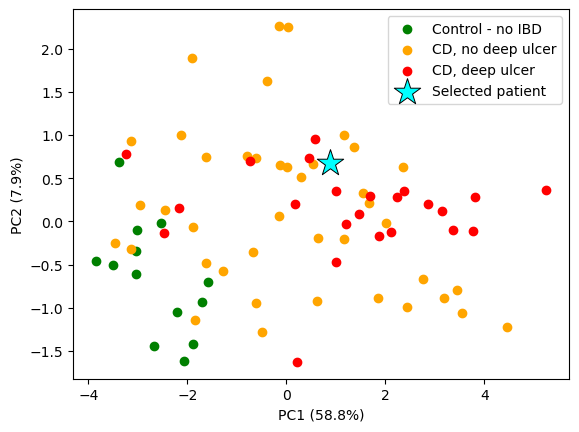

In [88]:


plot_pca(pca_dataset, selected_patient_idx)

Patient moves into the control cluster

## CD No Deep Ulcer patient

In [89]:
test_set = x_test_scaled.copy()
test_set

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
253_CD_plain,0.869185,0.841880,0.930171,0.886737,0.835678,0.297964,0.668498,0.266670,0.278122,0.933520,...,0.339788,0.326732,0.0,0.862246,0.074473,0.0,0.498941,0.349920,0.0,0.0
105_CD_plain,0.853562,0.933532,0.942213,0.794578,0.890482,0.206529,0.298987,0.350745,0.495663,0.849038,...,0.354602,-0.031527,0.0,0.717305,0.039214,0.0,0.697073,0.268224,0.0,0.0
2_CD_plain,0.165531,0.141475,0.263684,0.198091,0.160503,0.888878,0.000000,0.134461,0.989132,0.202203,...,0.320002,0.379134,0.0,0.604202,0.610072,0.0,0.324065,0.375123,0.0,0.0
184_CD_plain,0.717121,0.660314,0.769417,0.752737,0.694874,0.514735,0.692365,0.271127,0.650742,0.694599,...,0.445680,0.178908,0.0,0.702114,0.325357,0.0,0.390919,0.185509,0.0,0.0
312_CD_plain,0.730072,0.722909,0.713076,0.743545,0.679258,0.308459,0.399235,0.129019,0.597529,0.720390,...,0.419254,0.312215,0.0,0.821584,0.632007,0.0,0.183158,0.271359,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107_CD_plain,0.736123,0.658232,0.772323,0.685637,0.658755,0.250970,0.247307,0.422075,0.555944,0.603675,...,0.379431,0.233196,0.0,0.759342,0.567491,0.0,0.404604,0.190411,0.0,0.0
279_CD_plain,0.220614,0.202090,0.182810,0.113245,0.105744,0.699851,0.000000,0.908485,0.688912,0.178259,...,0.181052,0.342262,0.0,0.639644,0.540444,0.0,0.397274,0.061934,0.0,0.0
179_CD_plain,0.724476,0.726774,0.766943,0.776284,0.690339,0.380637,0.440449,0.318944,0.558600,0.738787,...,0.331961,0.275577,0.0,0.886616,0.658049,0.0,0.259391,0.471132,0.0,0.0


In [90]:


selected_patient, pid = get_patient('CD_plain', 6)
selected_patient

41 possible


,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
58_CD_plain,0.712765,0.67885,0.86582,0.855696,0.828452,0.498697,0.567772,0.352862,0.317254,0.76505,...,0.211571,0.283032,0.0,0.703328,0.556984,0.0,0.415272,0.225017,0.0,0.0


In [91]:
pid

'58_CD_plain'

In [92]:
ind = pca_dataset.index
selected_patient_idx = ind.get_loc(pid)


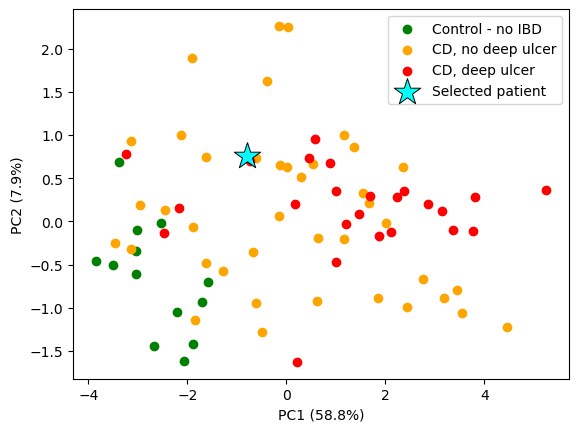

In [93]:


plot_pca(pca_dataset, selected_patient_idx)

### Modify gene expressions for the selected patient - 60 genes

In [94]:
test_set = x_test_scaled.copy()

selected_patient = test_set.loc[test_set.index.str.startswith(pid)]
selected_patient

# selected_patient, pid = get_patient('CD_deep_ulcer')
# selected_patient

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
58_CD_plain,0.712765,0.67885,0.86582,0.855696,0.828452,0.498697,0.567772,0.352862,0.317254,0.76505,...,0.211571,0.283032,0.0,0.703328,0.556984,0.0,0.415272,0.225017,0.0,0.0


In [95]:
with open("most_diff_genes_60", "rb") as fp:   # Unpickling
    most_diff_genes_60 = pickle.load(fp)

In [96]:
def modify_expression(pid, most_diff_genes, dataset):
    print("dataset size (should be test):",dataset.shape)
    controls = dataset.loc[dataset.index.str.endswith('_control')]
#     plains = x_test_scaled.loc[x_test_scaled.index.str.endswith('_CD_plain')]
#     ulcers = x_test_scaled.loc[x_test_scaled.index.str.endswith('_CD_deep_ulcer')]
    
    for gene_symbol in most_diff_genes:
        new_val = controls.describe().loc["mean", gene_symbol]
        dataset.loc[dataset.index.str.startswith(pid), gene_symbol] = new_val
    return dataset



In [97]:
test_set.columns

Index(['AADAC', 'APOA1', 'APOA4', 'APOB', 'APOC3', 'AQP9', 'C6', 'CEACAM7',
       'CHI3L1', 'ABCC2',
       ...
       'TAF15', 'ZFYVE20', 'LOC100420253', 'LY6G5B', 'C5orf58', 'RSL24D1P1',
       'MIEN1', 'PCBP1_AS1', 'LOC100133165', 'DNAJB8'],
      dtype='object', length=219)

In [98]:
test_set = modify_expression(pid, most_diff_genes_60, test_set)
test_set.loc[test_set.index.str.startswith(pid)]

dataset size (should be test): (78, 219)


,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
58_CD_plain,0.837271,0.67885,0.800854,0.834515,0.740914,0.498697,0.638968,0.173455,0.313654,0.836045,...,0.211571,0.283032,0.0,0.703328,0.556984,0.0,0.415272,0.225017,0.0,0.0


## Re-encoding the dataset

In [99]:
pca_dataset, pca_x_test = encode_pca(test_set)
pca_dataset

,0,1
Patient_ID,,
253_CD_plain,-2.938074,0.186826
105_CD_plain,-2.126290,1.013352
2_CD_plain,4.470625,-1.217936
184_CD_plain,0.013552,0.639135
312_CD_plain,-0.663766,-0.349455
...,...,...
107_CD_plain,-0.599124,-0.944227
279_CD_plain,3.545774,-1.068370
179_CD_plain,-1.281190,-0.573442


## Replot tSNE

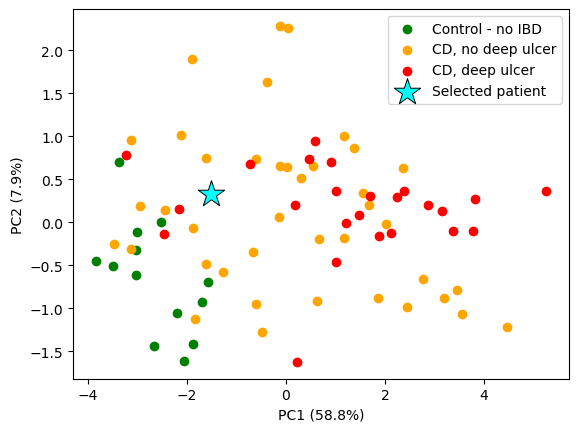

In [100]:


plot_pca(pca_dataset, selected_patient_idx)

### Modify gene expressions for the selected patient - 120 genes

In [101]:
test_set = x_test_scaled.copy()

selected_patient = test_set.loc[test_set.index.str.startswith(pid)]
selected_patient

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
58_CD_plain,0.712765,0.67885,0.86582,0.855696,0.828452,0.498697,0.567772,0.352862,0.317254,0.76505,...,0.211571,0.283032,0.0,0.703328,0.556984,0.0,0.415272,0.225017,0.0,0.0


In [102]:

# selected_patient = tsne_dataset.loc[tsne_dataset.index.str.startswith(pid)]
# selected_patient

In [103]:
with open("most_diff_genes_115", "rb") as fp:   # Unpickling
    most_diff_genes = pickle.load(fp)

most_diff_genes

['FDCSP', 'FNDC4', 'JKAMP', 'RUFY4']

In [104]:
test_set = modify_expression(pid, most_diff_genes, test_set)
test_set.loc[test_set.index.str.startswith(pid)]

dataset size (should be test): (78, 219)


,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
58_CD_plain,0.712765,0.67885,0.86582,0.855696,0.828452,0.498697,0.567772,0.352862,0.317254,0.76505,...,0.211571,0.283032,0.0,0.703328,0.556984,0.0,0.415272,0.225017,0.0,0.0


## Re-encoding the dataset

In [105]:
pca_dataset, pca_x_test = encode_pca(test_set)
pca_dataset

,0,1
Patient_ID,,
253_CD_plain,-2.947198,0.185932
105_CD_plain,-2.137259,0.996342
2_CD_plain,4.461854,-1.230253
184_CD_plain,0.003821,0.632336
312_CD_plain,-0.673183,-0.351477
...,...,...
107_CD_plain,-0.609229,-0.950407
279_CD_plain,3.538105,-1.063885
179_CD_plain,-1.291112,-0.575246


## Replot tSNE

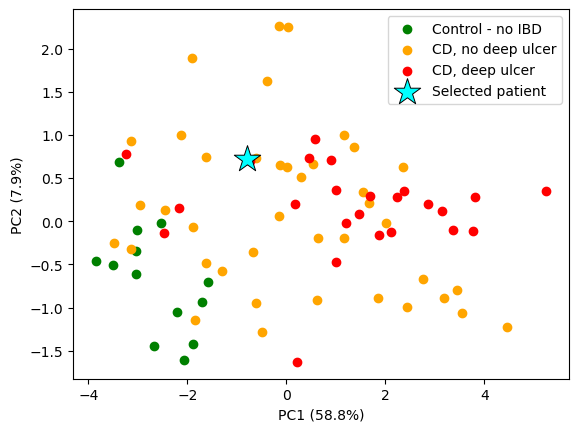

In [106]:


plot_pca(pca_dataset, selected_patient_idx)

Patient moves into the control cluster